In [3]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..')

import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
from sklearn.model_selection import train_test_split

# Import self-made modules
from project1_code.linear_model import LinearModel
from project1_code.make_and_prepare_data import FrankeFunction, create_design_matrix
from project1_code.model_selection import R2, MSE

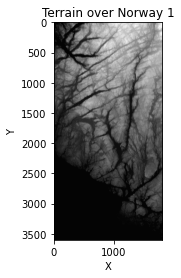

In [4]:
# Load the terrain
terrain1 = imread('SRTM_data_Norway_2.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [5]:
# Maximum height
y_max = terrain1.shape[0]
# Maximum width
x_max = terrain1.shape[1]

z = terrain1.flatten()

x = np.linspace(0, x_max, len(z))
y = np.linspace(0, y_max, len(z))

In [21]:
X = create_design_matrix(x, y, 10)
    
# Split data in train and test
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

    
# Train model
lr = LinearModel(regr_type='ridge', lamb=0.6)
lr = LinearModel()
lr.fit(X_train_scaled, z_train)

MemoryError: Unable to allocate 9.71 GiB for an array with shape (201, 6485401) and data type float64

In [ ]:
z_pred = lr.predict(X_test_scaled)
z_pred_train = lr.predict(X_train_scaled)
print(R2(z_pred, z_test))
print(R2(z_pred_train, z_train))

In [ ]:
print(MSE(z_pred, z_test))
print(MSE(z_pred_train, z_train))